In [21]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split


In [44]:
performance_df = pd.read_csv('./../../../data/uiuc_data/uiuc_data.csv')

In [45]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Ajustar os encoders
propname_encoder = LabelEncoder()
family_encoder = LabelEncoder()

performance_df['PropNameEnc'] = propname_encoder.fit_transform(performance_df['PropName'])
performance_df['FamilyEnc'] = family_encoder.fit_transform(performance_df['Family'])

# Salvar os encoders
# joblib.dump(propname_encoder, 'propname_encoder.pkl')
# joblib.dump(family_encoder, 'family_encoder.pkl')


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(performance_df[['N']])

print(scaler.data_max_)

performance_df['N'] = scaler.transform(performance_df[['N']])


[27050.]


In [47]:
target_column = 'CT'  
feature_columns = ['PropNameEnc', 'FamilyEnc','B', 'D', 'P', 'J', 'N']
output_columns = ['CT', 'CP', 'eta']

# Separate the features and target
features = performance_df[feature_columns].values
outputs = performance_df[output_columns].values

# Extract the target variable
target_values = outputs[:, output_columns.index(target_column)]

In [36]:
performance_df.dtypes

PropName        object
BladeName       object
Family          object
B                int64
D              float64
P              float64
J              float64
N              float64
CT             float64
CP             float64
eta            float64
PropNameEnc      int64
FamilyEnc        int64
dtype: object

In [48]:
performance_df.head()

,PropName,BladeName,Family,B,D,P,J,N,CT,CP,eta,PropNameEnc,FamilyEnc
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.165,0.117196,0.0993,0.0539,0.304,0,0
1,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.214,0.117196,0.0947,0.0543,0.374,0,0
2,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.255,0.117196,0.0916,0.0548,0.427,0,0
3,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.301,0.117196,0.0847,0.0540,0.473,0,0
4,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.340,0.117196,0.0796,0.0530,0.511,0,0


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_values, test_size=0.2, random_state=42)

In [50]:
# Initialize and train the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model initialization
regressor = DecisionTreeRegressor()

In [51]:
# Training the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [52]:
# Making predictions
predictions = regressor.predict(X_test)

In [53]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)

print('MAE:', mae)
print('MSE:', mse)
print('Accuracy:', accuracy)

MAE: 0.0037120685579196213
MSE: 3.48527869709038e-05
Accuracy: 0.9823040845785012


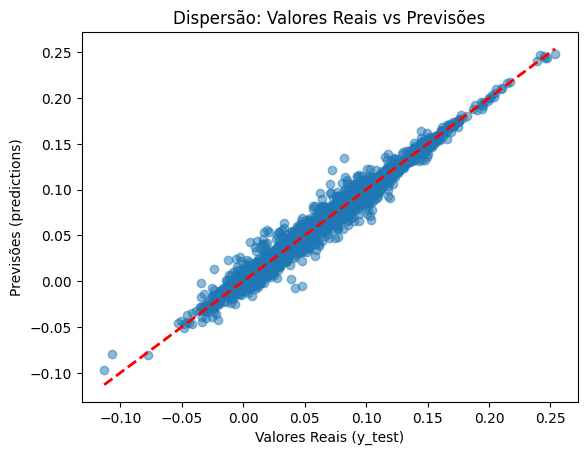

In [56]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Previsões (predictions)')
plt.title('Dispersão: Valores Reais vs Previsões')
plt.show()
